In [11]:
run "/Users/octavia/Dropbox/fire/fire_model/startup.py"

## Read parameter file

In [14]:
# Simulation batch
sim_dir = os.path.join(project_dir, "model_output", "data")
file_dir = os.path.join(sim_dir, "all_sims")
if os.path.isdir(file_dir)  == False:
    os.mkdir(file_dir)
    
sys.path.append(sim_dir)
if "params" in sys.modules:
    del sys.modules["params"]
from params import all_params


In [15]:
all_sims = read_all_sims(file_dir)

In [16]:
len(all_sims)

284

In [17]:
sim = all_sims.iloc[0]

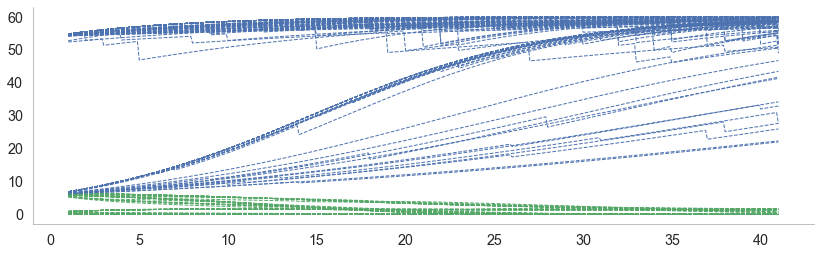

In [18]:
fig, ax = plt.subplots(1, figsize = (14,4) )

for key in all_sims.index[:100]:
    p = all_sims.loc[key][0]
    line_u = ax.plot(p.t_p, 
        p.G_u_list, 'b--', lw = 1, 
        label ="upper canopy")       
    line_l = ax.plot(p.t_p, 
        p.G_l_list, 'g--', lw = 1, 
        label ="upper canopy")          
    

In [19]:
res = pd.DataFrame()
var_list = list(default_params().keys())

for key in all_sims.index:

    p = all_sims.loc[key][0]

    param = pd.Series(vars(p))[var_list]
    
    g_u =  p.G_u/p.k_u
    g_l =  p.G_l/p.k_l
    

    results = pd.Series({"G_u" : p.G_u, 
               "G_l" : p.G_l, 
               "g_l" : g_l, 
               "g_u" : g_u})
    param = param.append(results)

    res = res.append(param, ignore_index = True)
res.index = all_sims.index

In [20]:
res["conifer"] = res["g_l"] < res["g_u"]

In [8]:
res.beta

alpha-0.04,beta-0.0,veg-2.0,S-0.14    0.0
alpha-0.04,beta-0.0,veg-1.0,S-0.34    0.0
alpha-0.04,beta-0.5,veg-1.0,S-0.42    0.5
alpha-0.04,beta-0.0,veg-1.0,S-0.08    0.0
alpha-0.04,beta-0.5,veg-1.0,S-0.56    0.5
                                     ... 
alpha-0.02,beta-0.5,veg-2.0,S-0.1     0.5
alpha-0.04,beta-0.5,veg-1.0,S-0.98    0.5
alpha-0.04,beta-0.0,veg-2.0,S-0.19    0.0
alpha-0.04,beta-0.0,veg-2.0,S-0.31    0.0
alpha-0.02,beta-0.0,veg-2.0,S-0.2     0.0
Name: beta, Length: 352, dtype: float64

In [9]:
len(res)

352